In [ ]:
!ls ./'сокращение по частотности'

 check_trainVStest.ipynb
'test_1.Первый жанр исходная выборка - distilbert-base-multilingual.csv'
'test_1.Первый жанр исходная выборка - roberta-base.csv'
'test_2.Первый жанр без клауз, включающих наречия - distilbert-base-multilingual.csv'
'test_2.Первый жанр без клауз, включающих наречия - roberta-base.csv'
'test_3.Первый жанр без клауз, включающих глаголы - distilbert-base-multilingual.csv'
'test_3.Первый жанр без клауз, включающих глаголы - roberta-base.csv'
'test_4.Первый жанр без клауз, включающих глаголы и наречия - distilbert-base-multilingual.csv'
'test_4.Первый жанр без клауз, включающих глаголы и наречия - roberta-base.csv'
'test_Изъяты лексемы с частотой выше 100 - Modelo 0.csv'
'test_Изъяты лексемы с частотой выше 100 - Modelo 1.csv'
'test_Изъяты лексемы с частотой выше 100 - Modelo 2.csv'
'test_Изъяты лексемы с частотой выше 100 - Modelo 3.csv'
'test_Изъяты лексемы с частотой выше 100 - distilbert-base-multilingual.csv'
'test_Изъяты лексемы с частотой выше 100 - roberta-b

In [ ]:
import pandas as pd
from nltk import ngrams
from collections import Counter

# 'test_1.Первый жанр исходная выборка - distilbert-base-multilingual.csv'
# 'test_1.Первый жанр исходная выборка - roberta-base.csv'
# 'test_2.Первый жанр без клауз, включающих наречия - distilbert-base-multilingual.csv'
# 'test_2.Первый жанр без клауз, включающих наречия - roberta-base.csv'
# 'test_3.Первый жанр без клауз, включающих глаголы - distilbert-base-multilingual.csv'
# 'test_3.Первый жанр без клауз, включающих глаголы - roberta-base.csv'
# 'test_4.Первый жанр без клауз, включающих глаголы и наречия - distilbert-base-multilingual.csv'


# 'train_1.Первый жанр исходная выборка - roberta-base.csv'
# 'train_2.Первый жанр без клауз, включающих наречия - distilbert-base-multilingual.csv'
# 'train_2.Первый жанр без клауз, включающих наречия - roberta-base.csv'
# 'train_3.Первый жанр без клауз, включающих глаголы - distilbert-base-multilingual.csv'
# 'train_3.Первый жанр без клауз, включающих глаголы - roberta-base.csv'
# 'train_4.Первый жанр без клауз, включающих глаголы и наречия - distilbert-base-multilingual.csv'


train_file = "сокращение по частотности/train_1.Первый жанр исходная выборка - roberta-base.csv"
test_file = "сокращение по частотности/test_1.Первый жанр исходная выборка - roberta-base.csv"

train_df = pd.read_csv(train_file, encoding='utf-8')
test_df = pd.read_csv(test_file, encoding='utf-8')

train_texts = train_df['text'].tolist()
test_texts = test_df['text'].tolist()


def generate_ngrams(text, n=2):
    # Dividir el texto en palabras
    words = text.split()
    # Generar N-gramas
    return list(ngrams(words, n))

# Definir el tamaño de los N-gramas (puedes cambiarlo: 2 para bigramas, 3 para trigramas, etc.)
n = 4
train_ngrams = []
for text in train_texts:
    train_ngrams.extend(generate_ngrams(text, n))

test_ngrams = []
for text in test_texts:
    test_ngrams.extend(generate_ngrams(text, n))
  
train_ngram_set = set(train_ngrams)
test_ngram_set = set(test_ngrams)


intersecciones = train_ngram_set.intersection(test_ngram_set)

# Mostrar resultados
if intersecciones:
    print(f"Se encontraron intersecciones de {n}-gramas entre 'train' y 'test':")
    for ngram in intersecciones:
        # Convertir el N-grama a una cadena legible
        ngram_text = " ".join(ngram)
        print(f"- {ngram_text}")
    print(f"Total de intersecciones: {len(intersecciones)}")
else:
    print(f"No se encontraron intersecciones de {n}-gramas entre 'train' y 'test'.")


In [ ]:
import numpy as np
from transformers import AutoTokenizer
from collections import Counter
import matplotlib.pyplot as plt
tokenizer = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased')


def get_token_lengths(texts, tokenizer):
    lengths = []
    for text in texts:
        tokens = tokenizer.encode(text, add_special_tokens=True)  # Incluye [CLS] y [SEP]
        lengths.append(len(tokens))
    return lengths 

train_lengths = get_token_lengths(train_texts, tokenizer)
test_lengths = get_token_lengths(test_texts, tokenizer)


              

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Estadísticas para Train:
Promedio: 24.56
Mediana: 20.00
Mínimo: 4
Máximo: 154
Percentil 90: 44.00
Percentil 95: 56.00
Percentil 99: 79.89

Estadísticas para Test:
Promedio: 21.95
Mediana: 20.00
Mínimo: 4
Máximo: 76
Percentil 90: 37.00
Percentil 95: 42.80
Percentil 99: 61.56

Muestreo de frecuencias para Train (10 más comunes):
Longitud 16: 41 textos
Longitud 9: 39 textos
Longitud 15: 37 textos
Longitud 7: 34 textos
Longitud 11: 32 textos
Longitud 14: 31 textos
Longitud 18: 30 textos
Longitud 20: 29 textos
Longitud 19: 28 textos
Longitud 13: 28 textos

Muestreo de frecuencias para Test (10 más comunes):
Longitud 24: 11 textos
Longitud 18: 10 textos
Longitud 16: 8 textos
Longitud 22: 8 textos
Longitud 10: 7 textos
Longitud 21: 7 textos
Longitud 29: 7 textos
Longitud 17: 7 textos
Longitud 11: 6 textos
Longitud 20: 6 textos


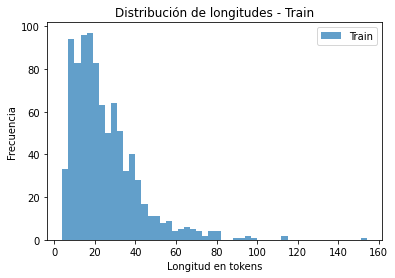

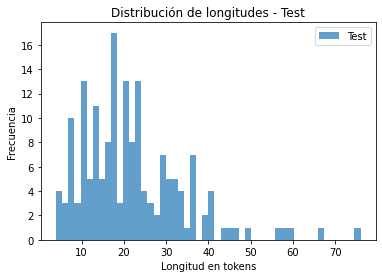


Sugerencia de max_length (basado en percentil 95): 56


In [ ]:
def print_stats(lengths, name):
    print(f"\nEstadísticas para {name}:")
    print(f"Promedio: {np.mean(lengths):.2f}")
    print(f"Mediana: {np.median(lengths):.2f}")
    print(f"Mínimo: {np.min(lengths)}")
    print(f"Máximo: {np.max(lengths)}")
    print(f"Percentil 90: {np.percentile(lengths, 90):.2f}")
    print(f"Percentil 95: {np.percentile(lengths, 95):.2f}")
    print(f"Percentil 99: {np.percentile(lengths, 99):.2f}")

# Frecuencias de longitudes
def print_frequency_sample(lengths, name):
    counter = Counter(lengths)
    print(f"\nMuestreo de frecuencias para {name} (10 más comunes):")
    for length, freq in counter.most_common(10):
        print(f"Longitud {length}: {freq} textos")

# Visualización
def plot_lengths(lengths, name):
    plt.hist(lengths, bins=50, alpha=0.7, label=name)
    plt.xlabel('Longitud en tokens')
    plt.ylabel('Frecuencia')
    plt.title(f'Distribución de longitudes - {name}')
    plt.legend()
    plt.show()

# Ejecutar análisis
print_stats(train_lengths, "Train")
print_stats(test_lengths, "Test")
print_frequency_sample(train_lengths, "Train")
print_frequency_sample(test_lengths, "Test")
plot_lengths(train_lengths, "Train")
plot_lengths(test_lengths, "Test")

# Sugerencia de max_length
max_length_suggestion = int(max(np.percentile(train_lengths, 95), np.percentile(test_lengths, 95)))
print(f"\nSugerencia de max_length (basado en percentil 95): {max_length_suggestion}")